In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

plt.style.use('ggplot')
import nltk

In [48]:
emotionModel = pipeline('text-classification', model=("SamLowe/roberta-base-go_emotions"))

In [49]:
# from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
df = pd.read_csv('comments.csv')

In [51]:
df.head()

,COMMENTS
0,What’s happened to Seth green 😂😂
1,My dad passed away in 2020 and up until his la...
2,Never thought I’d be watching this show since ...
3,I love family guy 😂😂😂😂 I hope they never stop 😂😂
4,Better than The Simpsons by far 💯


In [52]:
for i in range(len(df['COMMENTS'])):
    if (type(df['COMMENTS'][i])!=str):
        df['COMMENTS'][i]= str(df['COMMENTS'][i])

In [53]:
text_set = set()
for i in df['COMMENTS']:
    # words=i.split()
    text_set.add(i)

In [54]:
#converting the set to a list

comment_list = list(text_set)

In [55]:
print(comment_list)

['@macfarlaneseth @familyguyfox Will you guys ever make a Family Guy movie?', '25 years of laughter!! it is my favorite show up until today since the age of 7.. a comfort show indeedd', '🐐', 'I love it when Stewie as Darth Vader taunts Seth Green as Chris… 😂😂😂', 'Seth Green has that big head syndrome a lot of celebrities get for some reason?', 'I’ve been a huge Family Guy fan for a while now, I quote lines and reference scenes regularly in conversation but the newer episodes are just so on the nose it’s not fun or funny. Like the last couple of years it’s just been pretty bad I’m ngl like some jokes land but the majority are just good, it hurts me to say this. Still love you guys tho, also, the Ted tv series was fucking awesome, like the early seasons of the Goldbergs (before it went to hell) and Family Guy and Ted all in one. I love it', 'Seth Green went from 20s to 50 in a day', 'i would marry seth macfarlane', 'Lois this is your husband henrik szilagyi', 'Don’t stop! Maybe I’ll see 

In [56]:
def get_emotion(text):
  return(emotionModel(text)[0]['label'])

In [57]:
#Testing the model on basic sentences

labels= emotionModel(["I am having a great day","I'm sorry that the order got delayed"])
labels

[{'label': 'joy', 'score': 0.760153591632843},
 {'label': 'remorse', 'score': 0.7610507607460022}]

In [58]:
# using the model on list of words.

labels = emotionModel(comment_list)
labels

[{'label': 'curiosity', 'score': 0.7089196443557739},
 {'label': 'joy', 'score': 0.7594606280326843},
 {'label': 'neutral', 'score': 0.8693289756774902},
 {'label': 'love', 'score': 0.9441665410995483},
 {'label': 'neutral', 'score': 0.7454193830490112},
 {'label': 'love', 'score': 0.7302348613739014},
 {'label': 'neutral', 'score': 0.9463308453559875},
 {'label': 'neutral', 'score': 0.7750638723373413},
 {'label': 'neutral', 'score': 0.9578446745872498},
 {'label': 'optimism', 'score': 0.5362333059310913},
 {'label': 'neutral', 'score': 0.4440378248691559},
 {'label': 'love', 'score': 0.9628503322601318},
 {'label': 'love', 'score': 0.8583944439888},
 {'label': 'anger', 'score': 0.4948350489139557},
 {'label': 'neutral', 'score': 0.9690293669700623},
 {'label': 'neutral', 'score': 0.607123851776123},
 {'label': 'admiration', 'score': 0.84762042760849},
 {'label': 'curiosity', 'score': 0.8125441074371338},
 {'label': 'amusement', 'score': 0.7901958227157593},
 {'label': 'love', 'score'

In [59]:
(labels[0]['label'])

'curiosity'

In [60]:
import csv
# Open a CSV file in write mode
with open('emotions.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)
    
    # Write header row
    csv_writer.writerow(['Comments', 'Labels'])
    
    # Write data rows
    for comment, label in zip(comment_list,labels):
        csv_writer.writerow([comment, label['label']])

In [61]:
#Finding total unique emotions

label_set = set()
for i in labels:
    label_set.add(i['label'])

In [62]:
print(label_set)

{'excitement', 'annoyance', 'disapproval', 'joy', 'realization', 'fear', 'love', 'anger', 'sadness', 'curiosity', 'remorse', 'neutral', 'gratitude', 'surprise', 'admiration', 'optimism', 'approval', 'disappointment', 'amusement', 'caring', 'embarrassment'}


In [63]:
# Dictionary to store frequencies
frequency_dict = {}

# Count frequencies
for item in labels:
    label = item['label']
    if label in label_set:
        frequency_dict[label] = frequency_dict.get(label, 0) + 1


In [64]:
print(frequency_dict)

{'curiosity': 6, 'joy': 6, 'neutral': 73, 'love': 42, 'optimism': 2, 'anger': 3, 'admiration': 14, 'amusement': 5, 'gratitude': 9, 'disappointment': 3, 'approval': 4, 'realization': 5, 'surprise': 2, 'annoyance': 2, 'embarrassment': 1, 'caring': 2, 'fear': 3, 'disapproval': 3, 'remorse': 1, 'excitement': 1, 'sadness': 2}


In [65]:
total = len(labels)
total

189

In [66]:
emotions_percentage = []
for i in frequency_dict:
    total_i = frequency_dict[i]
    percentage = (total_i/total)*100
    rounded_percentage = round(percentage, 2)
    dict = {}
    dict[i]=rounded_percentage
    emotions_percentage.append(dict)

In [67]:
print(emotions_percentage)

[{'curiosity': 3.17}, {'joy': 3.17}, {'neutral': 38.62}, {'love': 22.22}, {'optimism': 1.06}, {'anger': 1.59}, {'admiration': 7.41}, {'amusement': 2.65}, {'gratitude': 4.76}, {'disappointment': 1.59}, {'approval': 2.12}, {'realization': 2.65}, {'surprise': 1.06}, {'annoyance': 1.06}, {'embarrassment': 0.53}, {'caring': 1.06}, {'fear': 1.59}, {'disapproval': 1.59}, {'remorse': 0.53}, {'excitement': 0.53}, {'sadness': 1.06}]


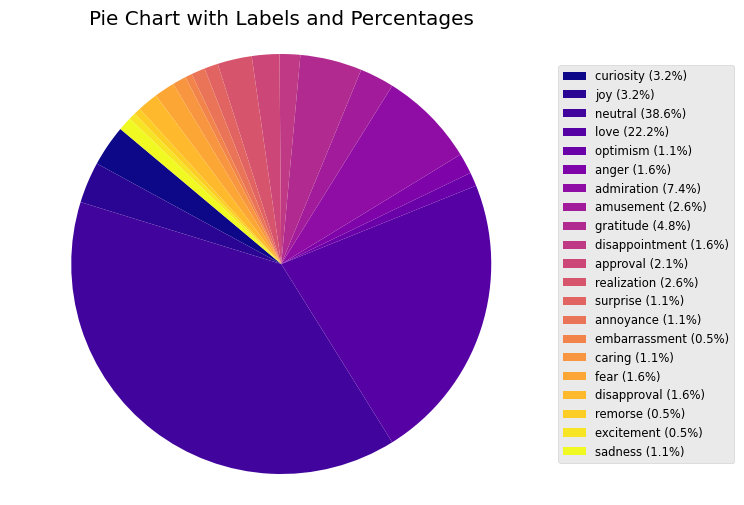

In [68]:
import matplotlib.pyplot as plt

# Calculate percentages
total = sum(frequency_dict.values())
percentages = [(freq / total) * 100 for freq in frequency_dict.values()]

# Create labels with element names and percentages
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(frequency_dict.keys(), percentages)]

# Generate a colormap with enough colors for the number of elements in the dictionary
colormap = plt.cm.plasma  # Choose a colormap (e.g., 'tab10')
colors = [colormap(i) for i in np.linspace(0, 1, len(frequency_dict))]

# Pie chart with labels and percentages
plt.figure(figsize=(7, 6))
plt.pie(frequency_dict.values(), labels=None, startangle=140, colors=colors)
plt.title('Pie Chart with Labels and Percentages')
# Add labels with bbox_to_anchor
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

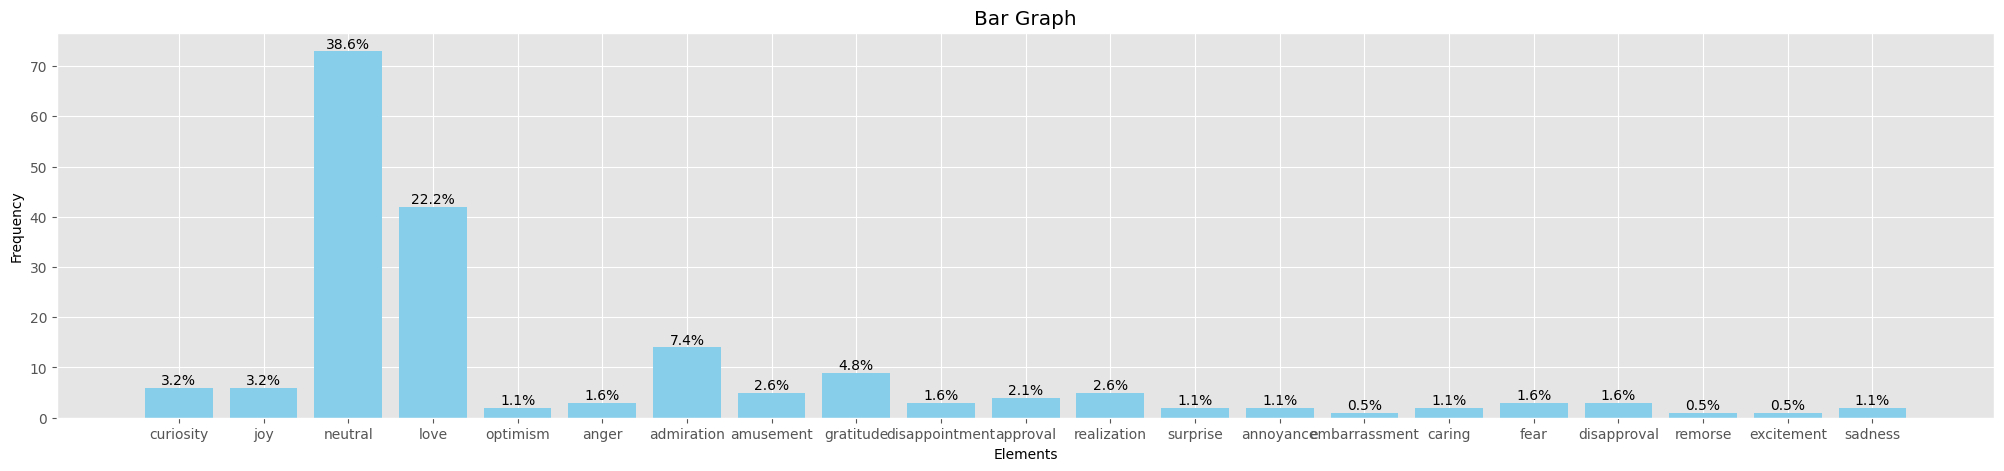

In [69]:
# Bar graph
plt.figure(figsize=(len(label_set)+4, 5))
bars = plt.bar(frequency_dict.keys(), frequency_dict.values(), color='skyblue')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Bar Graph')
# Add percentages at the top of each bar
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
plt.show()